In [96]:
import numpy as np
import pandas as pd

In [97]:
df = pd.read_csv('../DATA/airline_tweets.csv')

In [98]:
df = df[['airline_sentiment', 'text']]

In [99]:
df

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   text               14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


In [101]:
X = df['airline_sentiment']
y = df['airline_sentiment']

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [105]:
vector = TfidfVectorizer(stop_words='english')

In [106]:
vector.fit(X_train)

TfidfVectorizer(stop_words='english')

In [107]:
X_train = vector.transform(X_train)
X_test = vector.transform(X_test)

In [108]:
from sklearn.svm import SVC

In [109]:
model = SVC()

In [110]:
model.fit(X_train, y_train)

SVC()

In [111]:
y_pred = model.predict(X_test)

In [112]:
from sklearn.metrics import classification_report, confusion_matrix

In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      1889
     neutral       1.00      1.00      1.00       580
    positive       1.00      1.00      1.00       459

    accuracy                           1.00      2928
   macro avg       1.00      1.00      1.00      2928
weighted avg       1.00      1.00      1.00      2928



In [114]:
confusion_matrix(y_test, y_pred)

array([[1889,    0,    0],
       [   0,  580,    0],
       [   0,    0,  459]], dtype=int64)

In [115]:
import seaborn as sns

<Axes: xlabel='airline_sentiment', ylabel='count'>

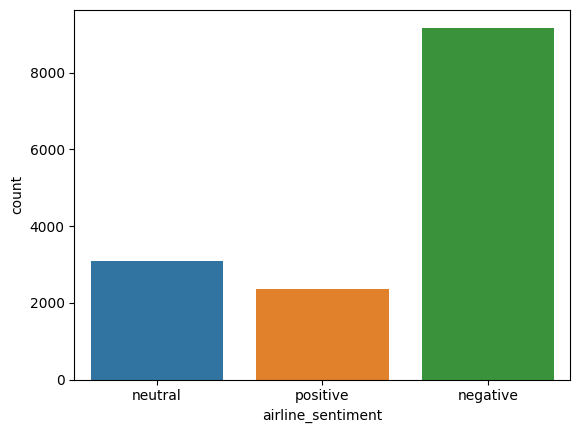

In [116]:
sns.countplot(x = df['airline_sentiment'])

In [117]:
df

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [118]:
new_data = np.array(['Bad'])

In [119]:
new_data = vector.transform(new_data)

In [120]:
new_data

<1x3 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [121]:
model.predict(new_data)

array(['positive'], dtype=object)